**Load Dataset**

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smmmmmmmm","key":"7b133f9532960b035175029dd9cafb37"}'}

In [4]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 14.8MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [5]:
data = pd.read_csv("StudentsPerformance.csv")

# Basic information about the dataset
data.info()
data.describe()
data.head()

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int

**Exploratory Data Analysis**


---


Distribution of Math Scores

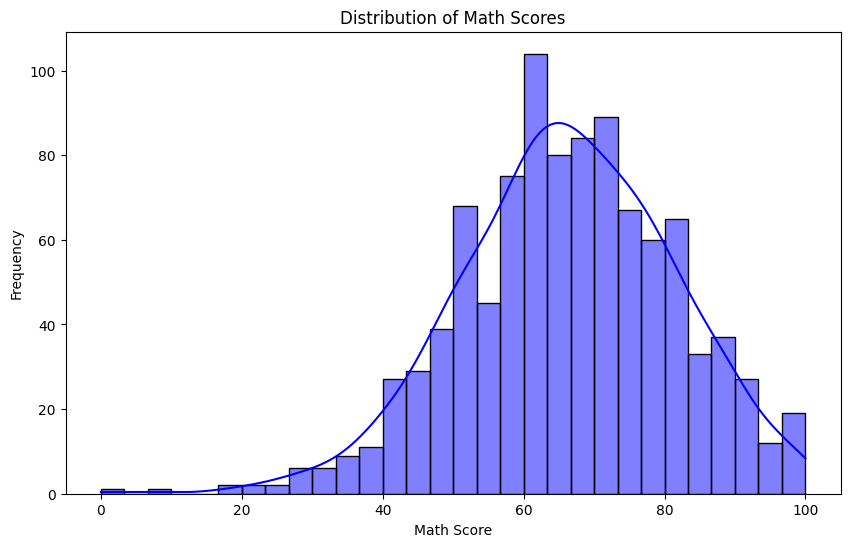

In [6]:
# Math Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['math score'], kde=True, bins=30, color='blue')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

Math Scores by Gender

<ipython-input-7-c913e99e1082>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='gender', y='math score', palette='Set2')


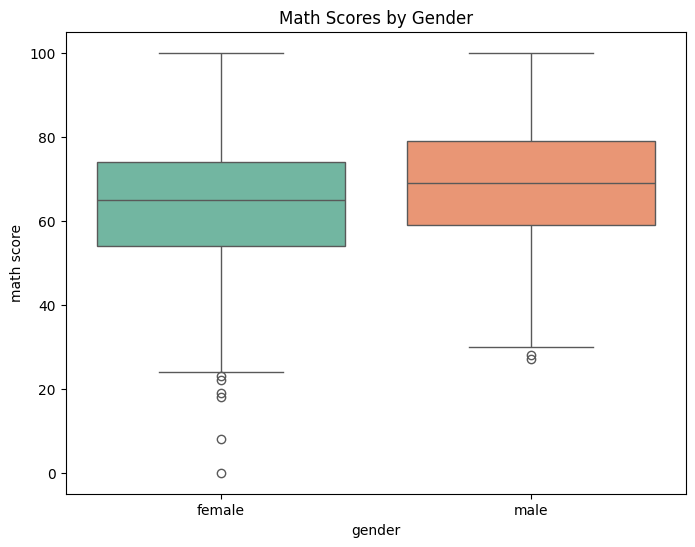

In [7]:
# Math Scores by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='gender', y='math score', palette='Set2')
plt.title("Math Scores by Gender")
plt.show()

Math Scores by Test Preparation Course

<ipython-input-8-de6f528f4d0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='test preparation course', y='math score', palette='Set3')


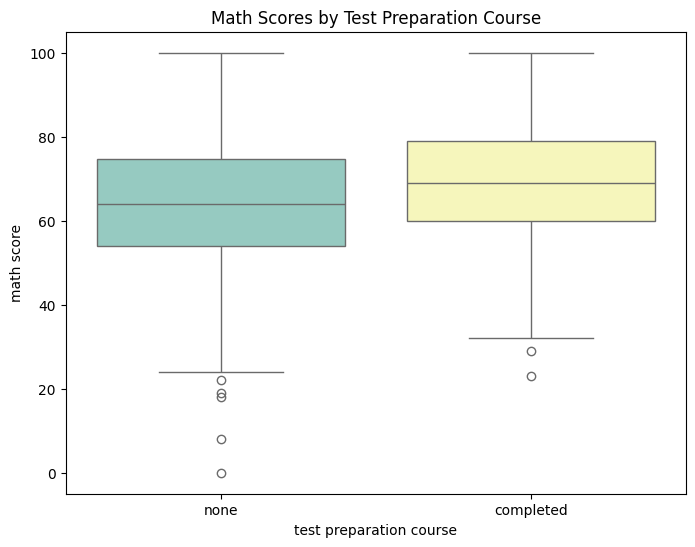

In [8]:
# Math Scores by Test Preparation
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='test preparation course', y='math score', palette='Set3')
plt.title("Math Scores by Test Preparation Course")
plt.show()

Correlation Between Scores

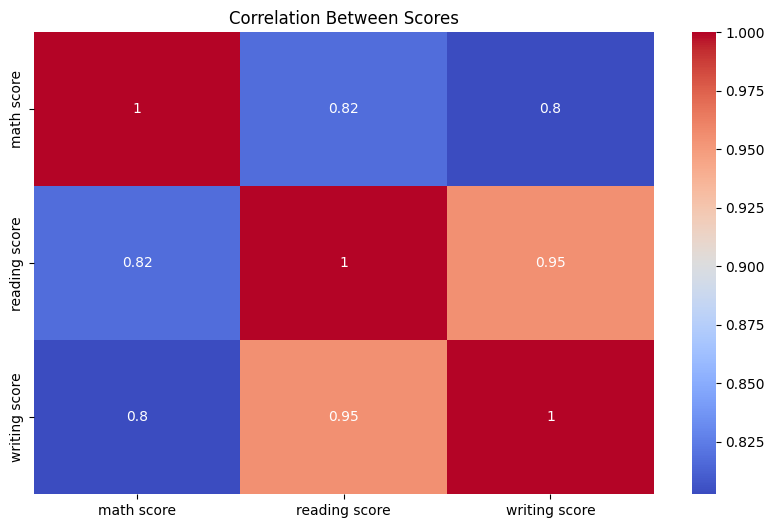

In [9]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()

**Machine Learning Models**


---

Data Preprocessing

In [10]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Features and Target
X = data_encoded.drop(columns=['math score'])
y = data_encoded['math score']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training


In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Display Results
results_df = pd.DataFrame(results).T
print(results_df)


                               MAE      RMSE        R2
Linear Regression         4.214763  5.393994  0.880433
Random Forest             4.740643  6.057694  0.849199
Support Vector Regressor  7.721690  9.594539  0.621699


Hyperparameter Tuning

In [12]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_sa

Distribution of Residuals

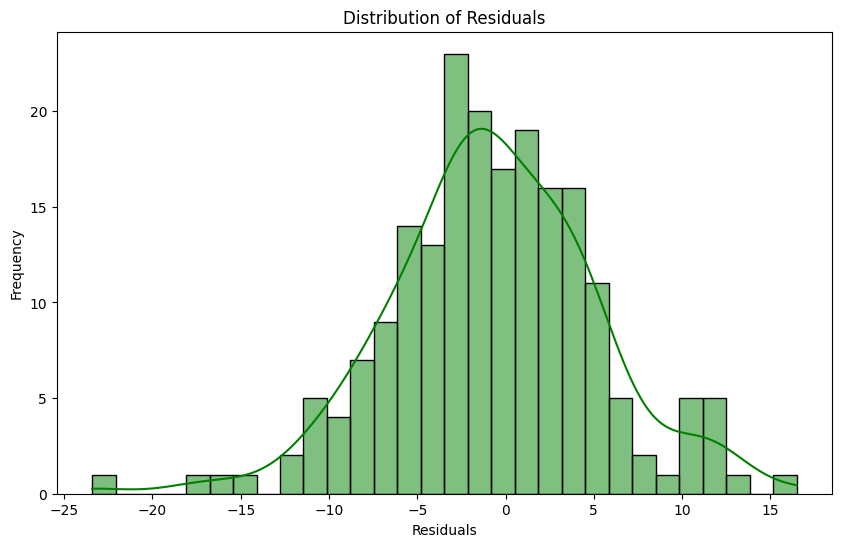

In [13]:
# Residual Analysis for Best Model
best_predictions = best_rf.predict(X_test)
residuals = y_test - best_predictions

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


**Forecasting**

In [14]:
# Recreate the column structure from the training dataset
# This includes all possible dummy variables seen during training
all_columns = X.columns.tolist()

# Create hypothetical scenarios with the exact same columns
hypothetical_data = pd.DataFrame({
    'reading score': [70, 80, 90],
    'writing score': [75, 85, 95],
    'gender_male': [1, 0, 1],
    'lunch_standard': [1, 0, 1],
    'test preparation course_none': [0, 1, 0],
    'test preparation course_completed': [1, 0, 1],
    'race/ethnicity_group A': [0, 0, 1],
    'race/ethnicity_group B': [0, 1, 0],
    'race/ethnicity_group C': [1, 0, 0],
    'race/ethnicity_group D': [0, 0, 1],
    'race/ethnicity_group E': [0, 0, 0],
    'parental level of education_associate\'s degree': [0, 1, 0],
    'parental level of education_bachelor\'s degree': [0, 0, 1],
    'parental level of education_high school': [1, 0, 0],
    'parental level of education_master\'s degree': [0, 0, 0],
    'parental level of education_some college': [0, 0, 1],
    'parental level of education_some high school': [0, 1, 0]
})

# Add any missing columns with zero values to align with training
for col in all_columns:
    if col not in hypothetical_data.columns:
        hypothetical_data[col] = 0

# Reorder columns to match training data
hypothetical_data = hypothetical_data[all_columns]

# Make Predictions
forecasted_scores = best_rf.predict(hypothetical_data)

# Display Forecasted Scores
print("Forecasted Math Scores:", forecasted_scores)


Forecasted Math Scores: [73.87852678 72.04869369 93.76501791]


Visualize Forecasts

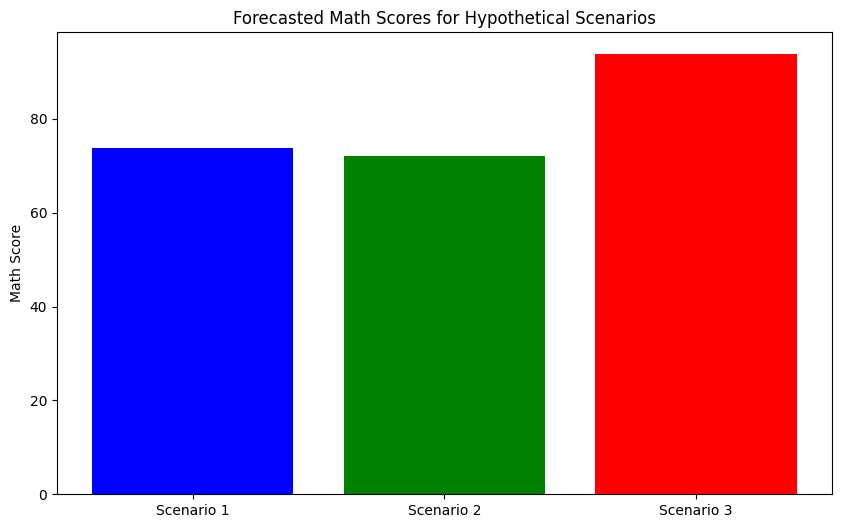

In [15]:
# Visualize Forecasted Scores
plt.figure(figsize=(10, 6))
plt.bar(['Scenario 1', 'Scenario 2', 'Scenario 3'], forecasted_scores, color=['blue', 'green', 'red'])
plt.title("Forecasted Math Scores for Hypothetical Scenarios")
plt.ylabel("Math Score")
plt.show()
